In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [80]:
img = cv2.imread('surprise.jpg')
img = cv2.resize(img, (0, 0), fx=0.15, fy=0.15, interpolation=cv2.INTER_AREA)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [81]:
lower = [120, 0, 0]
upper = [255, 100, 100]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
mask = cv2.inRange(img_rgb, lower, upper)

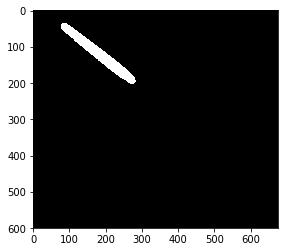

In [98]:
kernel_elps = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7, 7))
kernel_elps2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5, 5))
kernel = np.array([[0, 1, 1, 0, 0],
                   [1, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0]], dtype=np.uint8)

mask_morph = cv2.dilate(mask, kernel, iterations=1)
mask_morph = cv2.morphologyEx(mask_morph, cv2.MORPH_CLOSE, kernel_elps, iterations=2)
mask_morph = cv2.morphologyEx(mask_morph, cv2.MORPH_OPEN, kernel_elps2, iterations=2)
plt.imshow(mask_morph, cmap='gray')

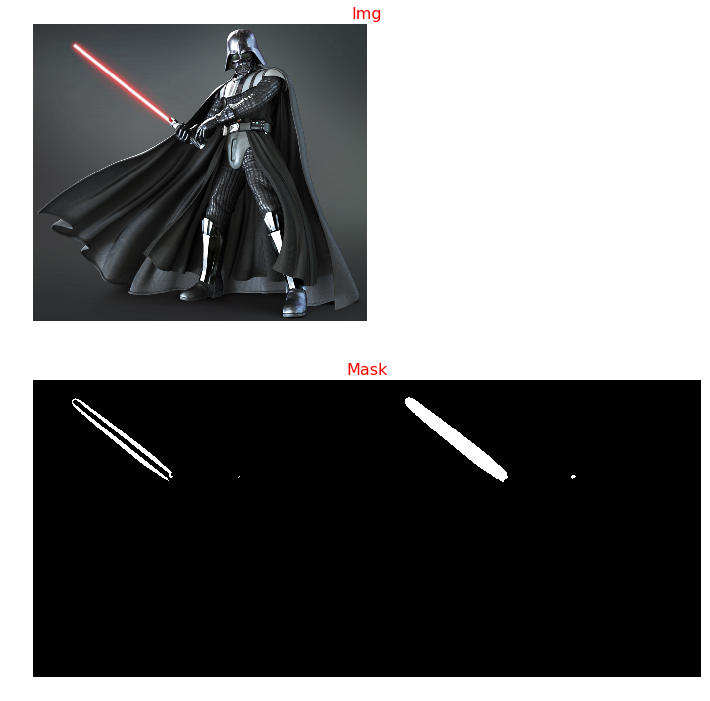

In [84]:
# show the images
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 12))
ax1.set_axis_off()
ax1.set_title('Img', fontsize=16, color="red")
ax2.set_axis_off()
ax2.set_title('Mask', fontsize=16, color="red")
ax1.imshow(img_rgb)
ax2.imshow(np.hstack([mask, mask_closing]), cmap='gray')
plt.show()

In [152]:
img = cv2.imread('Mouse2.jpg')
img = cv2.resize(img, (0, 0), fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [153]:
lower = [0, 0, 0]
upper = [95, 95, 95]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
mask = cv2.inRange(img_rgb, lower, upper)

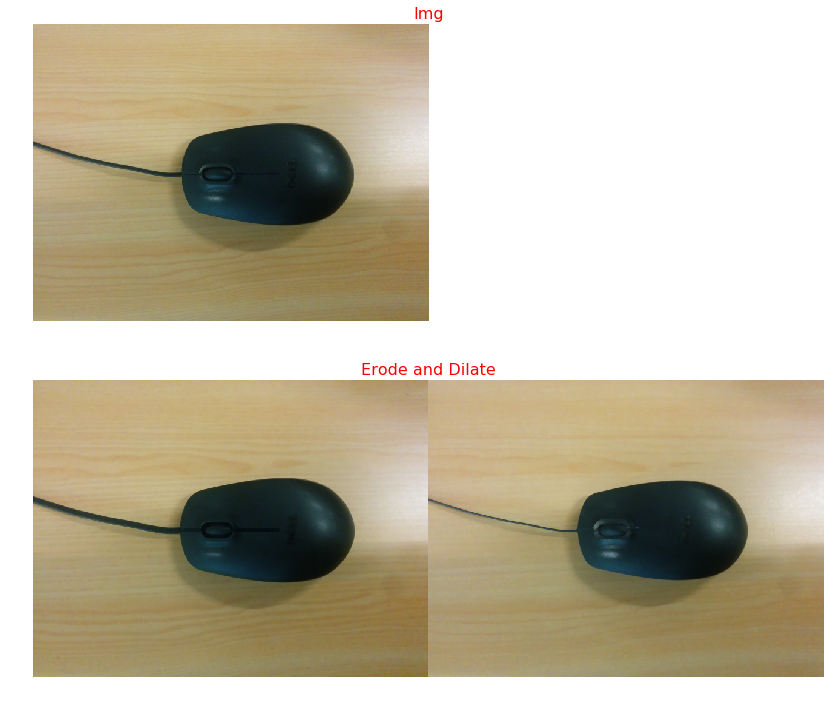

In [151]:
img_kernel_elps = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10, 10))

img_mask_morph_erode = cv2.erode(img_rgb, kernel_elps, iterations=2)
img_mask_morph_dilate = cv2.dilate(img_rgb, kernel_elps, iterations=2)

# show the images
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(20, 12))
ax1.set_axis_off()
ax1.set_title('Img', fontsize=16, color="red")
ax2.set_axis_off()
ax2.set_title('Erode and Dilate', fontsize=16, color="red")
ax1.imshow(img_rgb)
ax2.imshow(np.hstack([img_mask_morph_erode, img_mask_morph_dilate]))
plt.show()

In [154]:
kernel_elps = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3, 3))
kernel_elps2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5, 5))

mask_morph = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel_elps, iterations=2)
mask_morph = cv2.morphologyEx(mask_morph, cv2.MORPH_CLOSE, kernel_elps2, iterations=3)

# masked_img = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_morph)

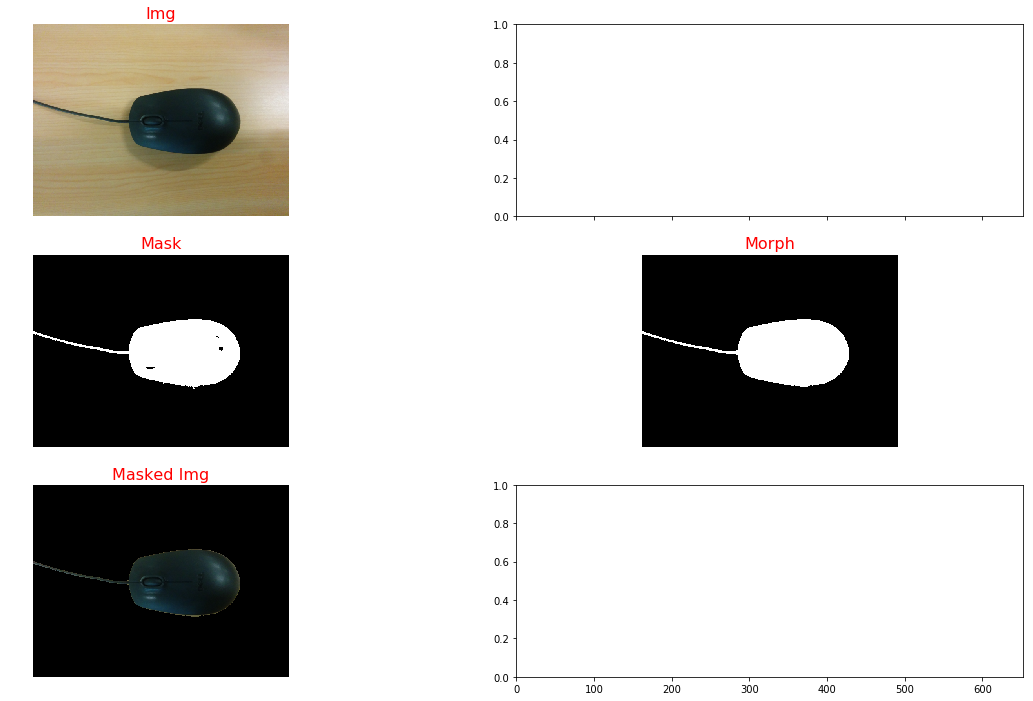

In [162]:
# show the images
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(20, 12))
ax1[0].set_axis_off()
ax1[0].set_title('Img', fontsize=16, color="red")
ax1[0].imshow(img_rgb)

ax2[0].set_axis_off()
ax2[0].set_title('Mask', fontsize=16, color="red")
ax2[0].imshow(mask, cmap='gray')

ax2[1].set_axis_off()
ax2[1].set_title('Morph', fontsize=16, color="red")
ax2[1].imshow(mask_morph, cmap='gray')

ax3[0].set_axis_off()
ax3[0].set_title('Masked Img', fontsize=16, color="red")
ax3[0].imshow(masked_img)

plt.show()